In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

x = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]

In [22]:
def returnData(x,k):
    temp = []
    for sup in range(k+1):
        temp.append(x**sup)
    return np.asarray(temp)

In [102]:
## Data Dimension
k = 1

## Input Data
train_x = []
for X in x:
    train_x.append(returnData(X,k))
train_x = np.asarray(train_x)

In [98]:
beta = 4
lambda1 = 1

mu_post = np.dot( np.linalg.inv(np.dot( np.transpose(train_x), train_x) + lambda1*np.identity(k+1)/beta),
                  np.dot(np.transpose(train_x), np.asarray(y)) )

sigma_post = np.linalg.inv(beta*np.dot(np.transpose(train_x), train_x) + lambda1*np.identity(k+1))


In [99]:
yPlt = []
xPlt = []
yPlt1 = []
yPlt2 = []
interval = 0.1
for i in np.arange(0.0,4.0+ interval,interval):
    xPlt.append(-1*(4-i))
    xData = returnData(-1*(4-i),k)
    mean = np.dot(np.transpose(mu_post), xData)
    var = np.dot(np.dot(np.transpose(xData), sigma_post ), xData ) + 1.0/beta
    yPlt.append(mean)
    yPlt1.append(mean - 2*var)
    yPlt2.append(mean + 2*var)
    
for i in np.arange(0.0,4.0+ interval,interval):
    xPlt.append(i)
    xData = returnData(i,k)
    mean = np.dot(np.transpose(mu_post), xData)
    var = np.dot(np.dot(np.transpose(xData), sigma_post ), xData ) + 1.0/beta
    yPlt.append(mean)
    yPlt1.append(mean - 2*var)
    yPlt2.append(mean + 2*var)

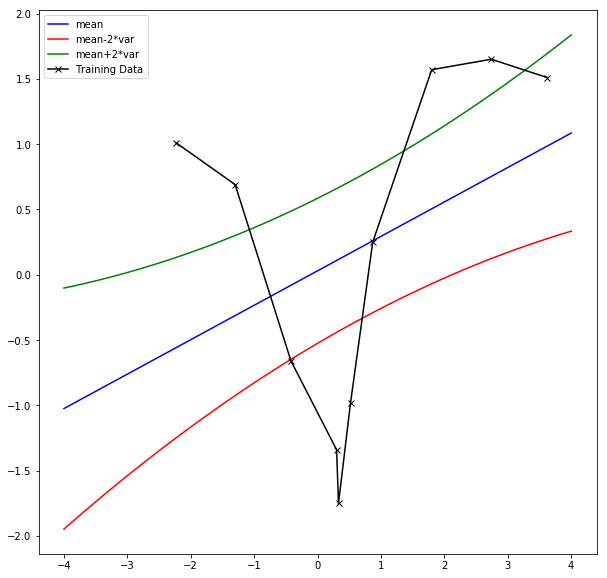

In [100]:
plt.plot(xPlt, yPlt, label="mean", color="blue")
plt.plot(xPlt, yPlt1, label="mean-2*var", color="red")
plt.plot(xPlt, yPlt2, label="mean+2*var", color="green")
check = plt.plot(x,y, marker='x', label="Training Data", color="black")
plt.rcParams["figure.figsize"] = [10,10]
plt.legend()
plt.show()

In [101]:
y = np.asarray(y)
N = len(y)
ml_exp = math.pow(math.e, -0.5*np.dot(np.dot(np.transpose(y),np.linalg.inv(np.identity(N)/beta + np.dot(train_x, 
                        np.transpose(train_x))/lambda1)), y) )
ml_const = np.linalg.det( np.identity(N)/beta + np.dot(train_x, np.transpose(train_x))/lambda1 )
ml_const = math.pow(ml_const,-0.5)/(math.pow(2*math.pi, N/2))
print "Marginal Likelihood for k = ", k, " : ",ml_const*ml_exp

Marginal Likelihood for k =  1  :  8.90631979852e-15
